In [55]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
import warnings
warnings.filterwarnings('ignore')

In [57]:
plt.style.use('seaborn-darkgrid')

In [58]:
%matplotlib inline

In [59]:
statewise_list_df=pd.read_csv("covid_19_india.csv")

In [60]:
statewise_list_df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [61]:
statewise_list_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1574 entries, 0 to 1573
Data columns (total 9 columns):
Sno                         1574 non-null int64
Date                        1574 non-null object
Time                        1574 non-null object
State/UnionTerritory        1574 non-null object
ConfirmedIndianNational     1574 non-null object
ConfirmedForeignNational    1574 non-null object
Cured                       1574 non-null int64
Deaths                      1574 non-null int64
Confirmed                   1574 non-null int64
dtypes: int64(4), object(5)
memory usage: 110.8+ KB


In [62]:
statewise_list_df['Date']=pd.to_datetime(statewise_list_df['Date'], format = '%d/%m/%y')

In [63]:
statewise_list_df=statewise_list_df.drop(['Sno', 'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Time'], axis=1)

In [64]:
statewise_list_df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [65]:
statewise_list_df.tail()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
1569,2020-05-03,Telengana,458,28,1063
1570,2020-05-03,Tripura,2,0,4
1571,2020-05-03,Uttarakhand,39,0,59
1572,2020-05-03,Uttar Pradesh,698,43,2626
1573,2020-05-03,West Bengal,151,33,922


In [66]:
overall_cases_df=statewise_list_df[['Date', 'Confirmed', 'Cured', 'Deaths']].groupby('Date').sum().reset_index()

In [67]:
overall_cases_df.tail()

,Date,Confirmed,Cured,Deaths
90,2020-04-29,31709,7797,1008
91,2020-04-30,33330,8373,1075
92,2020-05-01,34972,9065,1152
93,2020-05-02,37157,9951,1218
94,2020-05-03,40124,10887,1306


In [68]:
def get_daily_report(critrion, df):
    daily_case_series=[]
    df_length=len(df)
    for i in range(df_length):
        if i==0:
            daily_case_series.append(df[critrion].iloc[i])
        else:
            daily_case_series.append(df[critrion].iloc[i]-df[critrion].iloc[i-1])
    return daily_case_series


In [69]:
overall_cases_df['Daily_cases']= get_daily_report(critrion='Confirmed', df= overall_cases_df)
overall_cases_df['Daily_cured']= get_daily_report(critrion='Cured', df= overall_cases_df)
overall_cases_df['Daily_deaths']= get_daily_report(critrion='Deaths', df= overall_cases_df)

In [70]:
overall_cases_df['Active_cases']=overall_cases_df['Confirmed']-(overall_cases_df['Cured'] + overall_cases_df['Deaths'])
overall_cases_df['Death%']=round((overall_cases_df['Deaths']/(overall_cases_df['Cured'] + overall_cases_df['Deaths']))*100,2)
overall_cases_df['Cured%']=round((overall_cases_df['Cured']/(overall_cases_df['Cured'] + overall_cases_df['Deaths']))*100,2)
overall_cases_df['Growth%']=round((overall_cases_df['Daily_cases']/(overall_cases_df['Active_cases']))*100,2)


In [71]:
overall_cases_df.tail()

,Date,Confirmed,Cured,Deaths,Daily_cases,Daily_cured,Daily_deaths,Active_cases,Death%,Cured%,Growth%
90,2020-04-29,31709,7797,1008,1875,770,71,22904,11.45,88.55,8.19
91,2020-04-30,33330,8373,1075,1621,576,67,23882,11.38,88.62,6.79
92,2020-05-01,34972,9065,1152,1642,692,77,24755,11.28,88.72,6.63
93,2020-05-02,37157,9951,1218,2185,886,66,25988,10.91,89.09,8.41
94,2020-05-03,40124,10887,1306,2967,936,88,27931,10.71,89.29,10.62


In [72]:
def plot_bargraph(x_axis, y_axis, title):
    f,(ax1)=plt.subplots(1,1, figsize=(20,5))
    plt1=sns.barplot(x=x_axis,y=y_axis,
                    ax=ax1, color='grey', saturation=0.8)
    plt1.set_title(title, fontsize=25)
    plt.xticks(rotation=45)
    plt.show()
    plt.savefig('2.png')

In [73]:
def plot_lineplot(x_axis, y_axis, title, y_scale=None):
    f,(ax1)=plt.subplots(1,1, figsize=(12,5))
    plt1=sns.lineplot(x=x_axis,y=y_axis,ax=ax1)
    plt1.set_title(title, fontsize=15)
    plt.xticks(rotation=45)
    if y_scale!=None:
        plt.yscale(y_scale)
    plt.show()
    plt.savefig('1.png')
    

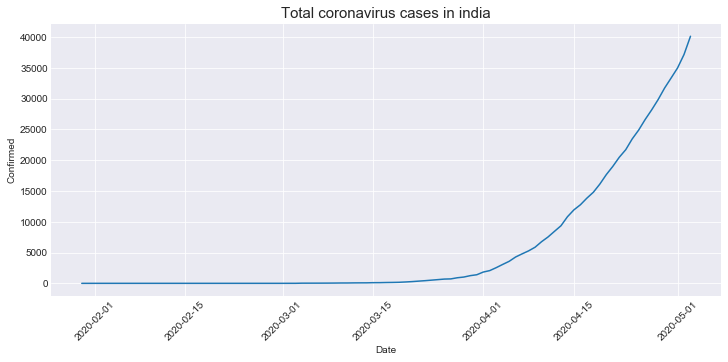

<Figure size 432x288 with 0 Axes>

In [84]:
plot_lineplot(x_axis=overall_cases_df['Date'],
             y_axis=overall_cases_df['Confirmed'],
             title="Total coronavirus cases in india")

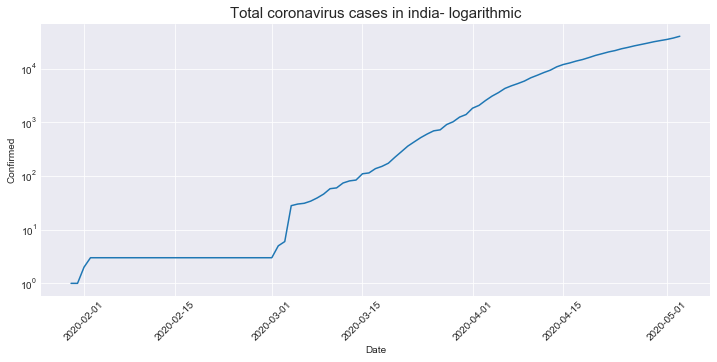

<Figure size 432x288 with 0 Axes>

In [75]:
plot_lineplot(x_axis=overall_cases_df['Date'],
             y_axis=overall_cases_df['Confirmed'],
             title="Total coronavirus cases in india- logarithmic", y_scale='log')

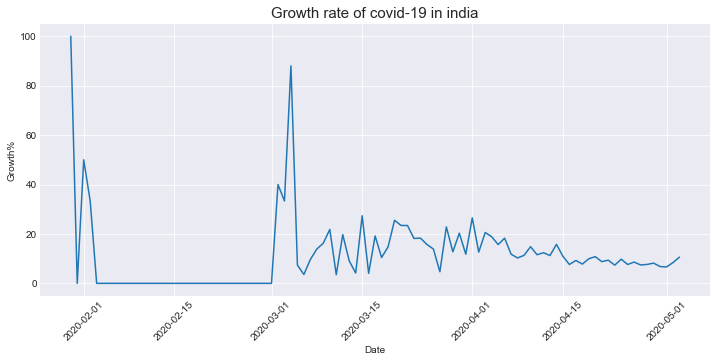

<Figure size 432x288 with 0 Axes>

In [76]:
plot_lineplot(x_axis=overall_cases_df['Date'], y_axis=overall_cases_df['Growth%'],
             title="Growth rate of covid-19 in india")

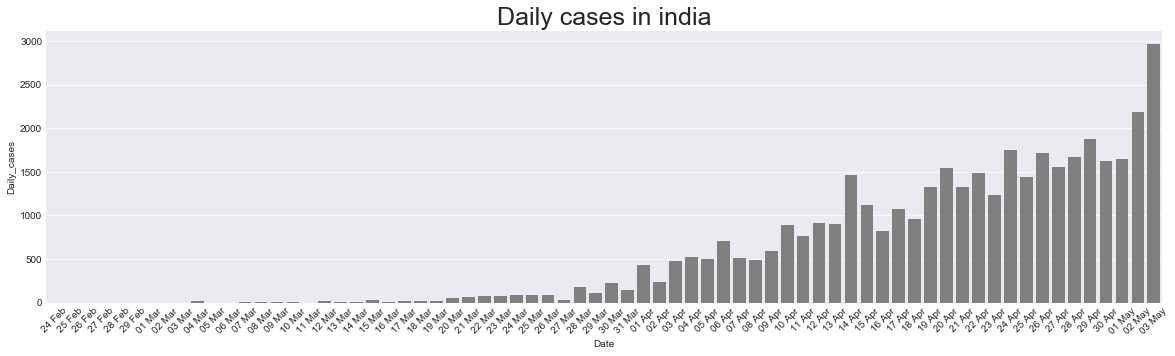

<Figure size 432x288 with 0 Axes>

In [77]:
plot_bargraph(overall_cases_df['Date'].loc[25:].dt.strftime('%d %b'),
             overall_cases_df['Daily_cases'].loc[25:], "Daily cases in india")

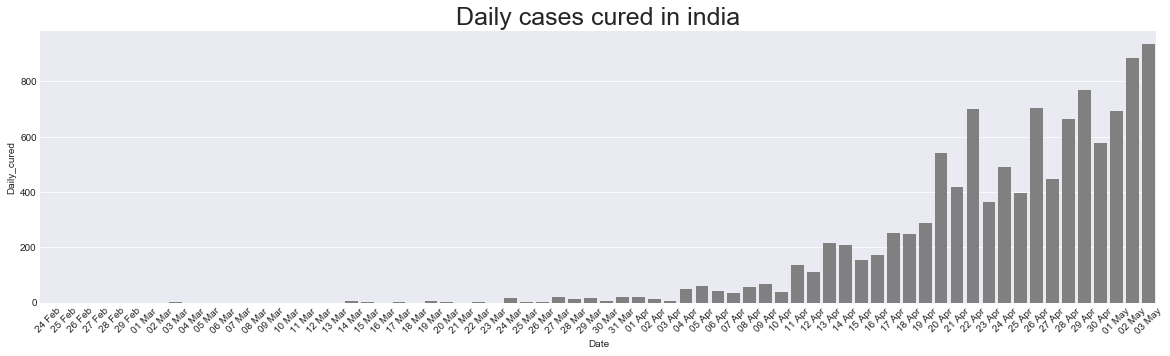

<Figure size 432x288 with 0 Axes>

In [78]:
plot_bargraph(overall_cases_df['Date'].loc[25:].dt.strftime('%d %b'),
             overall_cases_df['Daily_cured'].loc[25:], "Daily cases cured in india")

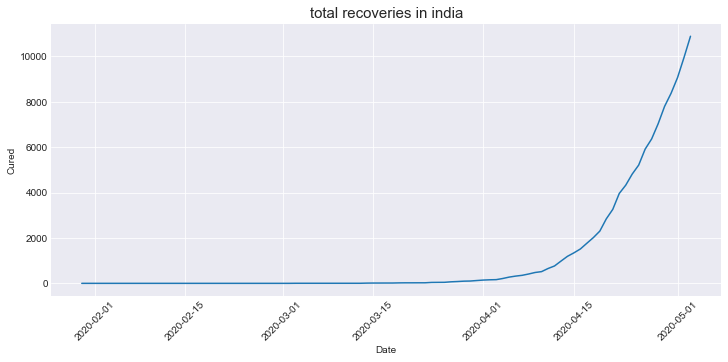

<Figure size 432x288 with 0 Axes>

In [79]:
plot_lineplot(x_axis=overall_cases_df['Date'],
             y_axis=overall_cases_df['Cured'],
             title="total recoveries in india")

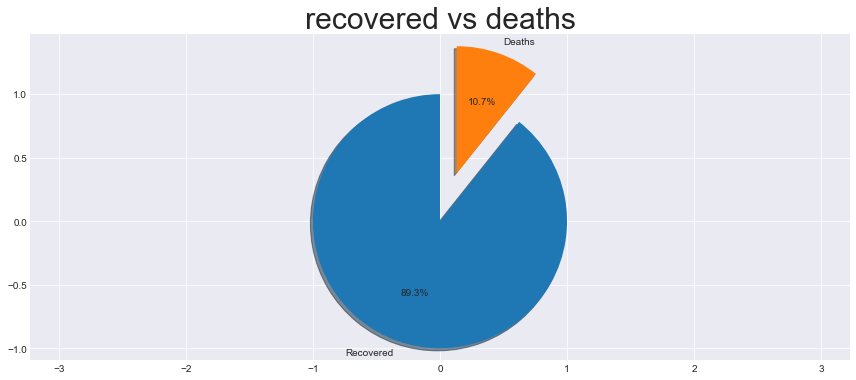

<Figure size 432x288 with 0 Axes>

In [80]:
labels=['Recovered','Deaths']
sizes=[overall_cases_df['Cured'].max(), overall_cases_df['Deaths'].max()]
explode = (0,0.4)
fig1, ax1=plt.subplots(figsize=(12,5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
       shadow=True, startangle=90, frame=True)
ax1.axis('equal')
plt.tight_layout()
plt.title("recovered vs deaths", fontsize=30)
plt.show()
plt.savefig('3.png')

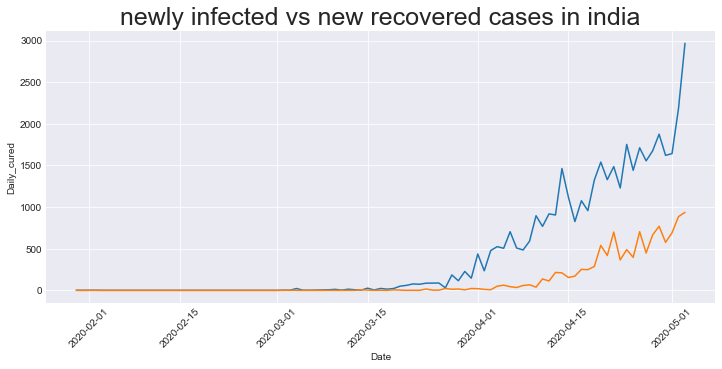

<Figure size 432x288 with 0 Axes>

In [81]:
f, (ax1) =plt.subplots(1,1, figsize=(12,5))
plt1=sns.lineplot(x=overall_cases_df['Date'], y=overall_cases_df['Daily_cases'], ax=ax1)

plt1=sns.lineplot(x=overall_cases_df['Date'], y=overall_cases_df['Daily_cured'], ax=ax1)

plt1.set_title("newly infected vs new recovered cases in india", fontsize=25)
plt.xticks(rotation=45)
plt.show()
plt.savefig('4.png')

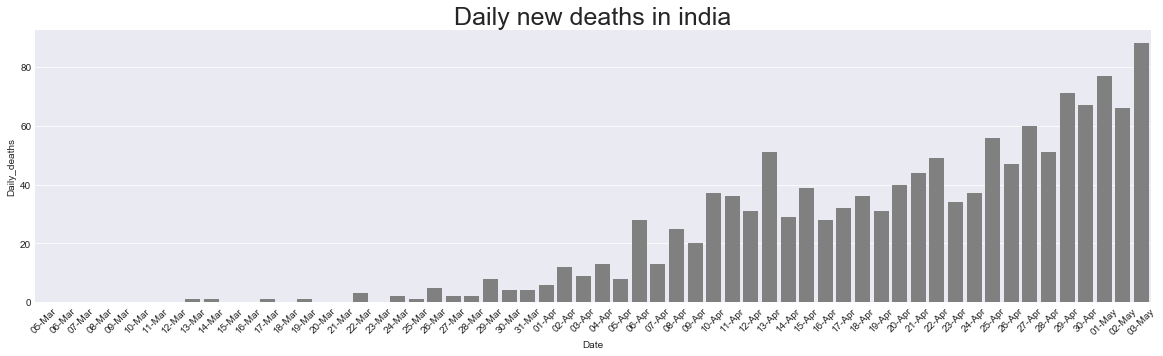

<Figure size 432x288 with 0 Axes>

In [82]:
plot_bargraph(overall_cases_df['Date'].loc[35:].dt.strftime('%d-%b'),
             overall_cases_df['Daily_deaths'].loc[35:], "Daily new deaths in india")

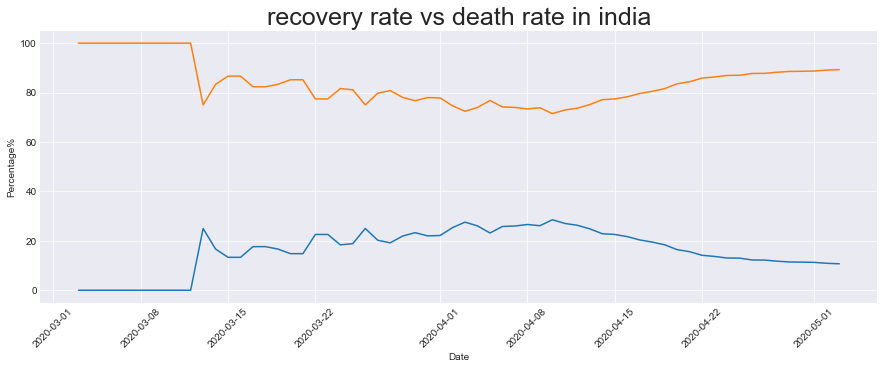

<Figure size 432x288 with 0 Axes>

In [83]:
f, (ax1)=plt.subplots(1,1,figsize=(15,5))
plt1=sns.lineplot(x=overall_cases_df['Date'], y=overall_cases_df['Death%'], ax=ax1)

plt1=sns.lineplot(x=overall_cases_df['Date'], y=overall_cases_df['Cured%'], ax=ax1)

plt1.set_title("recovery rate vs death rate in india", fontsize=25)
plt.xticks(rotation=45)
plt.ylabel("Percentage%")
plt.show()
plt.savefig('5.png')